In [37]:
import pickle
import pandas as pd
import seaborn as sns


In [78]:
with open('imdb_remakes_new.pkl','rb') as infile:
    movie_data_all = pickle.load(infile)


In [79]:
import csv
a=[]
with open('box-office-mojo-cleaned.csv') as f:
    for row in csv.DictReader(f,skipinitialspace=True):
        new_dict ={}
        for k,v in row.items():
            if k in ['cgross','theaters1','theaters2','opening_gross']:
                new_dict[k]= int(v)
            else:
                new_dict[k]=v
        a.append(new_dict)
#print(a)

In [80]:
imdb_df = pd.DataFrame(movie_data_all)
bm_df = pd.DataFrame(a)
bm_df =bm_df.drop(['release_data','cgross'], axis=1)
bm_df=bm_df.rename(index=str, columns={"theaters1": "totalTheatres", "theaters2": "openingTheaters"})

movies=pd.merge(imdb_df,bm_df,how='inner',on=['title'])
movies=movies.dropna()
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 2 to 354
Data columns (total 16 columns):
budget             125 non-null float64
certificate        125 non-null object
cgross             125 non-null float64
country            125 non-null object
genre              125 non-null object
gross              125 non-null float64
imdbRating         125 non-null float64
language           125 non-null object
primetime          125 non-null float64
release_date       125 non-null object
runtime            125 non-null float64
title              125 non-null object
opening_gross      125 non-null int64
studio             125 non-null object
totalTheatres      125 non-null int64
openingTheaters    125 non-null int64
dtypes: float64(6), int64(3), object(7)
memory usage: 16.6+ KB


In [81]:


movies.corr()


,budget,cgross,gross,imdbRating,primetime,runtime,opening_gross,totalTheatres,openingTheaters
budget,1.000000,0.636355,0.518113,0.161235,0.240603,0.436753,0.520599,0.393965,0.353596
cgross,0.636355,1.000000,0.949166,0.379712,0.159266,0.378806,0.512393,0.280501,0.184640
gross,0.518113,0.949166,1.000000,0.421640,0.145277,0.329618,0.543155,0.293948,0.198618
imdbRating,0.161235,0.379712,0.421640,1.000000,0.046341,0.605412,0.263454,0.161993,0.097927
primetime,0.240603,0.159266,0.145277,0.046341,1.000000,0.263572,0.265147,0.247122,0.222022
runtime,0.436753,0.378806,0.329618,0.605412,0.263572,1.000000,0.317962,0.217673,0.165204
opening_gross,0.520599,0.512393,0.543155,0.263454,0.265147,0.317962,1.000000,0.726599,0.733241
totalTheatres,0.393965,0.280501,0.293948,0.161993,0.247122,0.217673,0.726599,1.000000,0.961800
openingTheaters,0.353596,0.184640,0.198618,0.097927,0.222022,0.165204,0.733241,0.961800,1.000000


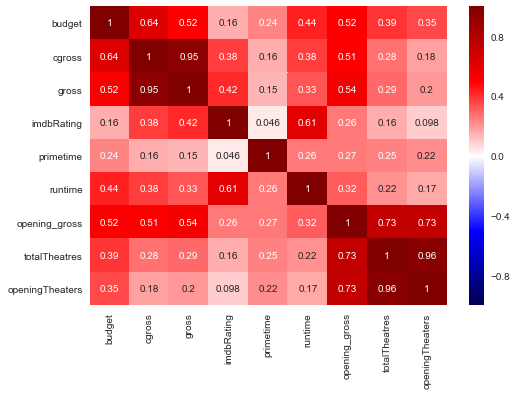

In [28]:
sns.heatmap(movies.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);



In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#scaler = StandardScaler()
#movies[['gross', 'budget','cgross','totalTheatres']] = scaler.fit_transform(movies[['gross', 'budget','cgross','totalTheatres']])
movies['log_gross'] = np.log(movies.gross)
movies['log_budget'] = np.log(movies.budget)
movies['log_cgross']=np.log(movies.cgross)


#y_train['cgross']=scaler.fit_transform(movies[['gross', 'budget','totalTheatres']])
#X_train[['gross', 'budget','totalTheatres']] = scaler.fit_transform(movies[['gross', 'budget','totalTheatres']])



In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC



In [164]:
#train_sizes = [20,50,80,100]
train_size = [10,15,25,50,75,90,100]
#features = ['budget','gross']
#target = 'cgross'
features = ['log_budget','primetime','imdbRating','openingTheaters','totalTheatres']
target = 'log_cgross'


train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = movies[features],
                                                   y = movies[target], train_sizes = train_sizes, cv = 5,
                                                   scoring ='neg_mean_squared_error' )
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) 
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.48388229 -0.29894867 -0.29894867 -0.29894867 -0.29894867]
 [-0.45811122 -0.35828699 -0.39969442 -0.39969442 -0.39969442]
 [-0.48881296 -0.42896147 -0.46877199 -0.42675772 -0.40664764]
 [-0.84604866 -0.83920306 -0.84614848 -0.79315047 -0.45657159]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.37449694 -0.58035305 -0.55806915 -0.74935239 -3.16804653]
 [-0.35736172 -0.56020799 -0.49412154 -0.65253172 -2.49390992]
 [-0.43874129 -0.61409825 -0.46391398 -0.62153293 -2.44716681]
 [-0.59230842 -0.5625995  -0.5384575  -0.80087183 -2.52918545]]


In [165]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 20     0.335935
50     0.403096
80     0.443990
100    0.756224
dtype: float64

 --------------------

Mean validation scores

 20     1.086064
50     0.911627
80     0.917091
100    1.004685
dtype: float64


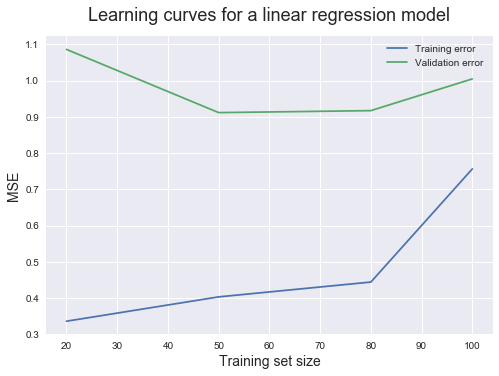

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()



In [158]:
import statsmodels.api as sm
#features = ['budget','totalTheatres','gross''runtime','primetime','openingTheaters']
#target = 'cgross'
features = ['log_budget','totalTheatres','imdbRating']
#features = ['log_budget','totalTheatres','imdbRating']


target = 'log_cgross'


X= movies[features]
y=movies[target]
X = sm.add_constant(X)
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_cgross   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     46.86
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           3.60e-20
Time:                        06:17:52   Log-Likelihood:                -162.34
No. Observations:                 125   AIC:                             332.7
Df Residuals:                     121   BIC:                             344.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.3242      1.724      1.348      0.180      -1.088       5.737
log_budget        0.7277      0.103      7.080      0.000       0.524       0.931
totalTheatres     0.0001    7.5e-05      1.870      0.064   -8.25e-06       0.000
imdbRating        0.4541      0.087      5.247      0.000       0.283       0.625
==============================================================================
Omnibus:                       18.147   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.203
Skew:                          -0.903   Prob(JB):                     2.49e-05
Kurtosis:                       3.901   Cond. No.                     5.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

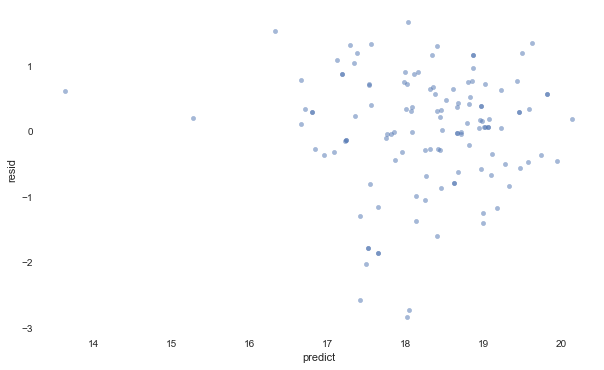

In [159]:
movies['predict']=fit.predict(X)
movies['resid']= y-movies.predict
with sns.axes_style('white'):
    plot = movies.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))
    



Text(0.5,1,'Normal Q-Q plot')

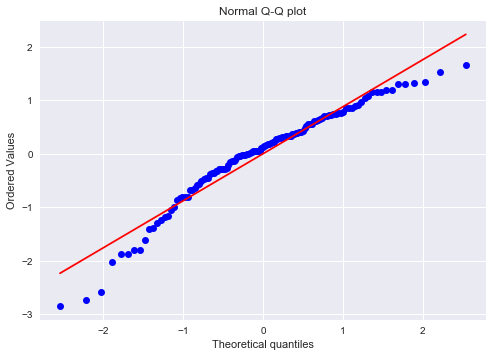

In [160]:
import scipy.stats as stats
res = y-movies.predict
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
    

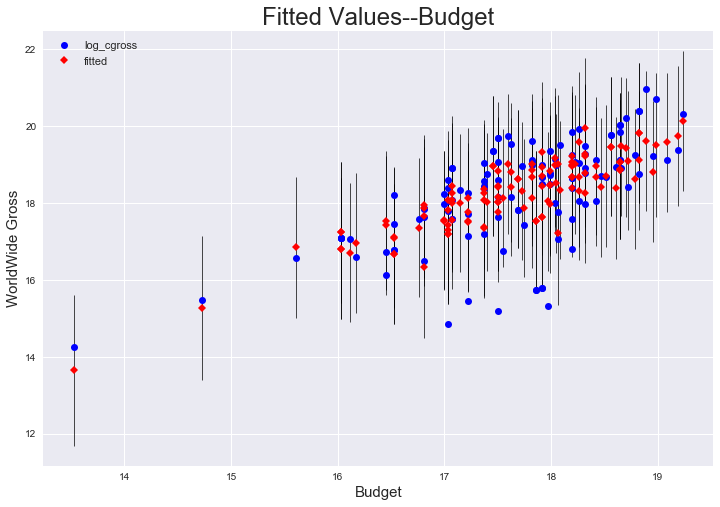

In [161]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(fit, "log_budget", ax=ax,markersize=5)

ax.set_title('Fitted Values--Budget',fontsize=24)
#ax.set_ylim([0,1e2])
ax.set_xlabel('Budget',fontsize=15)
ax.set_ylabel('WorldWide Gross',fontsize=15)
#ax.set_axis_bgcolor('white')
plt.legend(loc=2,prop={'size':11})

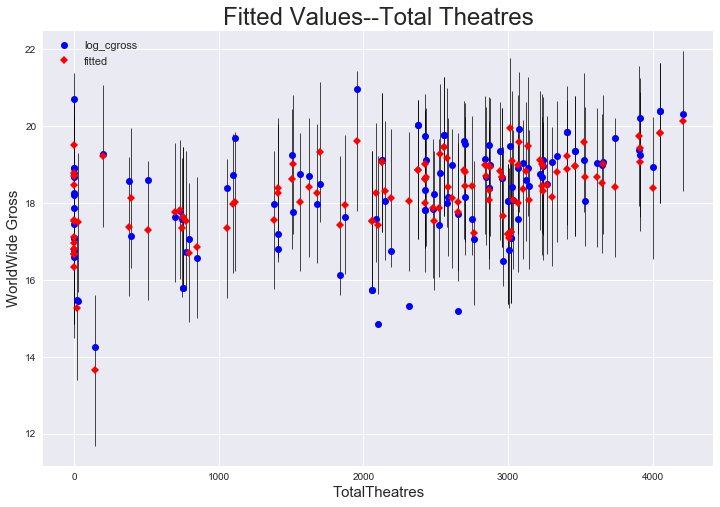

In [162]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(fit, "totalTheatres", ax=ax,markersize=5)

ax.set_title('Fitted Values--Total Theatres',fontsize=24)
#ax.set_ylim([0,1e2])
ax.set_xlabel('TotalTheatres',fontsize=15)
ax.set_ylabel('WorldWide Gross',fontsize=15)
#ax.set_axis_bgcolor('white')
plt.legend(loc=2,prop={'size':11})

In [113]:
from sklearn.linear_model import  RidgeCV
# Split the data into training and test sets
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
print ('Score = ', lr.score(X_test, y_test))

predictions_score = cross_val_score(lr, X_train, y_train, cv=10)
score = np.average(predictions_score)
print("""""""")
rcv = RidgeCV(cv=10)
rcv.fit(X, y)
rcv.score(X_test, y_test)

Score =  0.5290671340625135



0.5640356775752426